In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Parte A
---
En este caso nos piden las ecuaciones diferenciales. Por lo tanto lo que necesitamos es deducir de donde nace. Podemos saber por el propio enunciado que $$\frac{dN_A}{dt} = -\lambda_A N_A$$. Por otro lado para $B$ seria lo que le entra menos lo que le sale. Lo que sale sabemos que es $-\lambda_B N_B$ y lo que le entra es la derivada de $A$. Por lo tanto queda $$\frac{dN_B}{dt} = \lambda_A N_A - \lambda_B N_B$$ ponemos la derivada de $A$ en valor absoluto puesto que esta es una derivada negativa y en verdad nos interesa que sume (sin embargo se ve mas bonito y es mas facil de interpretar este valor absoluto). Por ultimo, en $C$ solo recibimos lo que viene de $B$ por lo que queda $$\frac{dN_C}{dt} = \lambda_B N_B$$. Por lo tanto el sistema queda como:
$$
\begin{align}
\frac{dN_A}{dt} &= -\lambda_A N_A\\
\frac{dN_B}{dt} &= \lambda_A N_A - \lambda_B N_B\\
\frac{dN_C}{dt} &= \lambda_B N_B
\end{align}
$$

---
# Parte B
---

In [2]:
def System(r,t,lA=0.5, lB=0.3):
    Na, Nb, Nc = r
    dNadt = -lA*Na
    dNbdt = lA*Na - lB*Nb
    dNcdt = lB*Nb
    return np.array([dNadt,dNbdt,dNcdt])

In [3]:
r0 = (500, 0, 0)
t = np.linspace(0, 10, 45)

In [4]:
sol = integrate.odeint(System,r0,t,args=(.5,))
# Ya aqui deberia estar integrado. Verifiquemos simplemente graficando

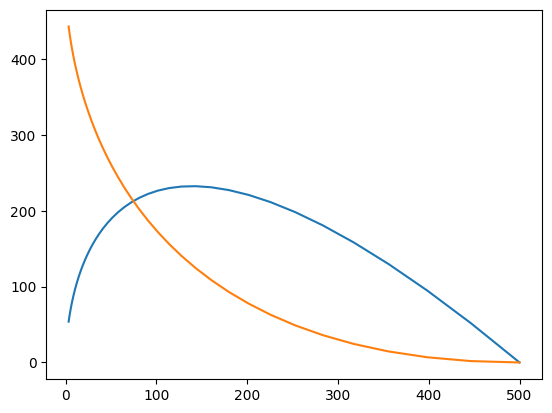

In [5]:
# Aqui mostramos la cantidad de particulas en B y en C con respecto a las que hay en A
plt.plot(sol[:,0],sol[:,1])
plt.plot(sol[:,0],sol[:,2])
plt.show()
plt.close()

---
# Parte C
---

Las funciones que aqui se utilizan son alteradas del repositorio de la clase en particular de este [archivo](https://github.com/asegura4488/MetodosComputacionalesII/blob/main/Week4/AdaptativoVectorizado.ipynb).

In [6]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1], r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1], r[2] + 0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [7]:
def CheckStep(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia = 0.001
    
    Delta1 = np.abs(Delta1)
    Delta2 = np.abs(Delta2)
    Delta3 = np.abs(Delta3)
    
    if Delta1 < tolerancia:
        h = minimo
        dx = Delta1
        
    else:
        
        if np.abs((Delta1 - Delta2))/Delta1 > maximo:
            h = 0.5*h
            dx = Delta2
        
        elif np.abs((Delta1-Delta3))/Delta1 < minimo:
            h = 2*h
            dx = Delta3
        
        else:
            dx = Delta1
            
    return dx,h

In [8]:
def Adaptativo(f,x0,t):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])
    
    while t < tf :
        Delta1 = Increment(f,r,t,h)
        Delta2 = Increment(f,r,t,0.5*h)
        Delta3 = Increment(f,r,t,2*h)
    
        Deltas = Delta1.copy()
        ht = Delta1.copy()
        
        for i in range(Delta1.shape[0]):
            Deltas[i],ht[i] = CheckStep(Delta1[i],Delta2[i],Delta3[i],h)
    
    
        h = np.mean(ht)
        t += h
        
        r = Increment(f,r,t,h)
        
        
        Steps = np.append(Steps,h )
        Time = np.append(Time,t)
        Vector = np.vstack((Vector,r))
        
    print(len(Steps))
    return Time,Vector,Steps

In [9]:
def adaptativo(f,r0,t,e=1e-4):

    h = t[1]-t[0]
    tf = t[-1]
    ti = t[0]
    r = r0

    Time = np.array([ti])
    Vector = r

    Steps = np.array([h])

    while ti < tf:
        r1 = Increment(f,r,t,h)
        r2 = Increment(f,r1,t+h,h)
        rt = Increment(f,r,t,2*h)

        error = np.linalg.norm(r2-rt)

        if error < e:
            ti += 2*h
            r = rt

            Steps = np.append(Steps,h)
            Time = np.append(Time,ti)
            Vector = np.vstack((Vector,r))

        q = 0.85 * (e/error)**(1/4)
        h = h*q

        
    return Time, Vector, Steps

time, x1, steps = adaptativo(System, r0, t)

---
# Parte D
---

In [10]:
r0 = (500, 0, 0)
t = np.linspace(0,10,45)
res = Adaptativo(System,r0,t)
# Ya en teoria debio funcionar.

67


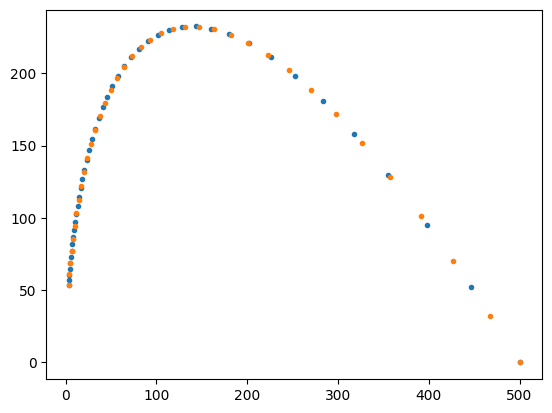

38


In [11]:
plt.scatter(sol[:,0],sol[:,1],marker='.')
plt.scatter(x1[:,0],x1[:,1],marker='.')
plt.show()
plt.close()
print(len(x1))

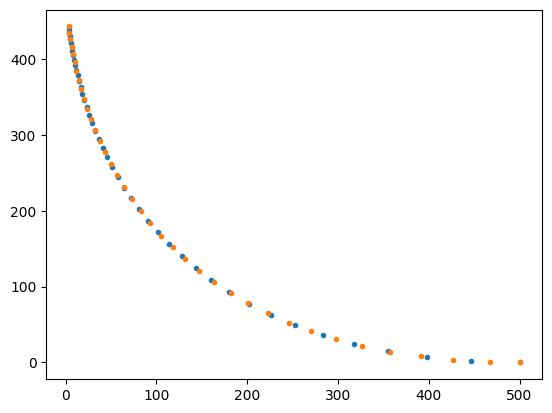

In [12]:
plt.scatter(sol[:,0],sol[:,2],marker='.')
plt.scatter(x1[:,0],x1[:,2],marker='.')
plt.show()
plt.close()

---
# Parte E
---
Como se puede ver la precisión de ambas graficas coinciden estrictamente pues le pedimos a odeint un error muy pequeño que hace que se vean muy similares.